In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
import operator
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895


In [4]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7199,7200,7201,7204,7204,7206,7206,7206,7212,7214
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2640,2653,2668,2685,2698,2705,2710,2713,2713,2725
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5777,5786,5797,5805,5812,5815,5819,5822,5826,5831
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1501,1513,1526,1537,1537,1567,1574,1577,1577,1587


In [5]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/26/21', '9/27/21', '9/28/21', '9/29/21', '9/30/21', '10/1/21',
       '10/2/21', '10/3/21', '10/4/21', '10/5/21'],
      dtype='object', length=627)

In [7]:
confirmed_filtered = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21
0,0,0,0,0,0,0,0,0,0,0,...,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309
1,0,0,0,0,0,0,0,0,0,0,...,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618
2,0,0,0,0,0,0,0,0,0,0,...,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046
3,0,0,0,0,0,0,0,0,0,0,...,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271
4,0,0,0,0,0,0,0,0,0,0,...,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895


In [8]:
singapore_confirmed_filtered = confirmed_cases[confirmed_cases["Country/Region"] == "Singapore"].loc[:, cols[4]:cols[-1]]
singapore_confirmed_filtered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21
230,0,1,3,3,4,5,7,7,10,13,...,87892,89539,91775,94043,96521,99430,101786,103843,106318,109804


In [9]:
deaths_filtered = death_cases.loc[:, cols[4]:cols[-1]]
deaths_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21
0,0,0,0,0,0,0,0,0,0,0,...,7199,7200,7201,7204,7204,7206,7206,7206,7212,7214
1,0,0,0,0,0,0,0,0,0,0,...,2640,2653,2668,2685,2698,2705,2710,2713,2713,2725
2,0,0,0,0,0,0,0,0,0,0,...,5777,5786,5797,5805,5812,5815,5819,5822,5826,5831
3,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,0,0,0,0,0,0,0,0,0,0,...,1501,1513,1526,1537,1537,1567,1574,1577,1577,1587


In [10]:
recovered_filtered = recovered_cases.loc[:, cols[4]:cols[-1]]
recovered_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
# Also, calculate the total mortality rate which is the death_sum/confirmed cases

dates = confirmed_filtered.keys()
world_cases = []
singapore_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed_filtered[i].sum()
    singapore_confirmed_sum = singapore_confirmed_filtered[i].sum()
    death_sum = deaths_filtered[i].sum()
    recovered_sum = recovered_filtered[i].sum()
    world_cases.append(confirmed_sum)
    singapore_cases.append(singapore_confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [12]:
confirmed_sum, death_sum, recovered_sum, world_cases, singapore_cases

(235825990,
 4816565,
 0,
 [557,
  655,
  941,
  1434,
  2118,
  2927,
  5578,
  6167,
  8235,
  9927,
  12038,
  16787,
  19887,
  23898,
  27643,
  30805,
  34399,
  37130,
  40161,
  42769,
  44811,
  45229,
  60381,
  66909,
  69052,
  71235,
  73270,
  75152,
  75652,
  76212,
  76841,
  78602,
  78982,
  79550,
  80404,
  81381,
  82740,
  84128,
  86022,
  88400,
  90379,
  92980,
  95282,
  98100,
  102016,
  106113,
  110051,
  114230,
  119055,
  126715,
  132516,
  146871,
  157971,
  169244,
  184026,
  200027,
  219598,
  246697,
  277571,
  309714,
  344819,
  387492,
  428574,
  479647,
  542581,
  607561,
  677320,
  733993,
  799332,
  876255,
  959236,
  1042395,
  1126206,
  1185350,
  1256186,
  1330135,
  1399769,
  1483064,
  1570048,
  1655371,
  1729756,
  1849385,
  1920405,
  2004272,
  2082494,
  2178187,
  2266228,
  2343416,
  2420183,
  2495740,
  2571744,
  2653235,
  2737233,
  2821347,
  2903698,
  2975166,
  3045415,
  3121219,
  3198417,
  3281703,
  

In [13]:
# Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
singapore_cases = np.array(singapore_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [14]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1434],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30805],
       [    34399],
       [    37130],
       [    40161],
       [    42769],
       [    44811],
       [    45229],
       [    60381],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79550],
       [    80404],
       [    81381],
       [    82740],
       [    84128],
       [    86022],
       [    88400],
       [    90379],
       [    92980],
       [    95282],
       [    98100],
       [   102016],
       [   106113],
       [   110051],
       [   114230],
       [   119055],
       [   126715],


In [15]:
singapore_cases

array([[     0],
       [     1],
       [     3],
       [     3],
       [     4],
       [     5],
       [     7],
       [     7],
       [    10],
       [    13],
       [    16],
       [    18],
       [    18],
       [    24],
       [    28],
       [    28],
       [    30],
       [    33],
       [    40],
       [    45],
       [    47],
       [    50],
       [    58],
       [    67],
       [    72],
       [    75],
       [    77],
       [    81],
       [    84],
       [    84],
       [    85],
       [    85],
       [    89],
       [    89],
       [    91],
       [    93],
       [    93],
       [    93],
       [   102],
       [   106],
       [   108],
       [   110],
       [   110],
       [   117],
       [   130],
       [   138],
       [   150],
       [   150],
       [   160],
       [   178],
       [   178],
       [   200],
       [   212],
       [   226],
       [   243],
       [   266],
       [   313],
       [   345],
       [   385

In [16]:
# Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [17]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [18]:
# visualisation with the latest data

latest_confirmed = confirmed_filtered[dates[-1]]
latest_deaths = deaths_filtered[dates[-1]]
latest_recoveries = recovered_filtered[dates[-1]]

latest_confirmed, latest_deaths, latest_recoveries

(0      155309
 1      172618
 2      204046
 3       15271
 4       59895
         ...  
 274    818324
 275    409489
 276      9234
 277    209199
 278    131205
 Name: 10/5/21, Length: 279, dtype: int64,
 0       7214
 1       2725
 2       5831
 3        130
 4       1587
        ...  
 274    19979
 275     4170
 276     1748
 277     3650
 278     4627
 Name: 10/5/21, Length: 279, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 259    0
 260    0
 261    0
 262    0
 263    0
 Name: 10/5/21, Length: 264, dtype: int64)

In [19]:
# create a list of unique countries

unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [20]:
# The next line of code will basically calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [21]:
# number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 43948011 cases
India: 33871881 cases
Brazil: 21499074 cases
United Kingdom: 8005496 cases
Russia: 7524465 cases
Turkey: 7296849 cases
France: 7127454 cases
Iran: 5651961 cases
Argentina: 5261935 cases
Spain: 4967200 cases
Colombia: 4964454 cases
Italy: 4686109 cases
Germany: 4272764 cases
Indonesia: 4221610 cases
Mexico: 3684242 cases
Poland: 2912876 cases
South Africa: 2907619 cases
Philippines: 2613070 cases
Ukraine: 2582818 cases
Malaysia: 2294457 cases
Peru: 2180149 cases
Netherlands: 2050250 cases
Iraq: 2014104 cases
Japan: 1707511 cases
Czechia: 1694910 cases
Chile: 1657749 cases
Thailand: 1657231 cases
Canada: 1651603 cases
Bangladesh: 1559452 cases
Israel: 1296343 cases
Romania: 1289156 cases
Pakistan: 1253868 cases
Belgium: 1253587 cases
Sweden: 1155534 cases
Portugal: 1072037 cases
Serbia: 974179 cases
Kazakhstan: 972679 cases
Morocco: 936236 cases
Cuba: 900512 cases
Switzerland: 845234 cases
Jordan: 828572 cases
Hungary: 825170 cases

In [22]:
# Find the list of unique provinces

# remove NaN
# unique_provinces =  list(confirmed_cases['Province/State'].unique())[1:]
unique_provinces =  list(confirmed_cases['Province/State'].unique())
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatchewan',
 'Yukon',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Unknown',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'New Caledonia',
 'Reu

In [23]:
# Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
for case in no_cases:
    unique_provinces.remove(case)

In [24]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 1190 cases
New South Wales: 66456 cases
Northern Territory: 212 cases
Queensland: 2051 cases
South Australia: 907 cases
Tasmania: 236 cases
Victoria: 45664 cases
Western Australia: 1110 cases
Alberta: 304502 cases
British Columbia: 190372 cases
Grand Princess: 13 cases
Manitoba: 61038 cases
New Brunswick: 4670 cases
Newfoundland and Labrador: 1824 cases
Northwest Territories: 1305 cases
Nova Scotia: 6839 cases
Nunavut: 664 cases
Ontario: 597147 cases
Prince Edward Island: 302 cases
Quebec: 412800 cases
Repatriated Travellers: 13 cases
Saskatchewan: 69331 cases
Yukon: 783 cases
Anhui: 1008 cases
Beijing: 1125 cases
Chongqing: 603 cases
Fujian: 1290 cases
Gansu: 199 cases
Guangdong: 3191 cases
Guangxi: 301 cases
Guizhou: 147 cases
Hainan: 190 cases
Hebei: 1318 cases
Heilongjiang: 1711 cases
Henan: 1542 cases
Hong Kong: 12237 cases
Hubei: 68298 cases
Hunan: 1189 cases
Inner Mongolia: 420 cases
Jiangsu: 1600 cases
Jiangxi: 937 cases
Jilin: 577 cases
Liaoning: 

In [25]:
# handling nan values if there is any

nan_indices = [] 

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

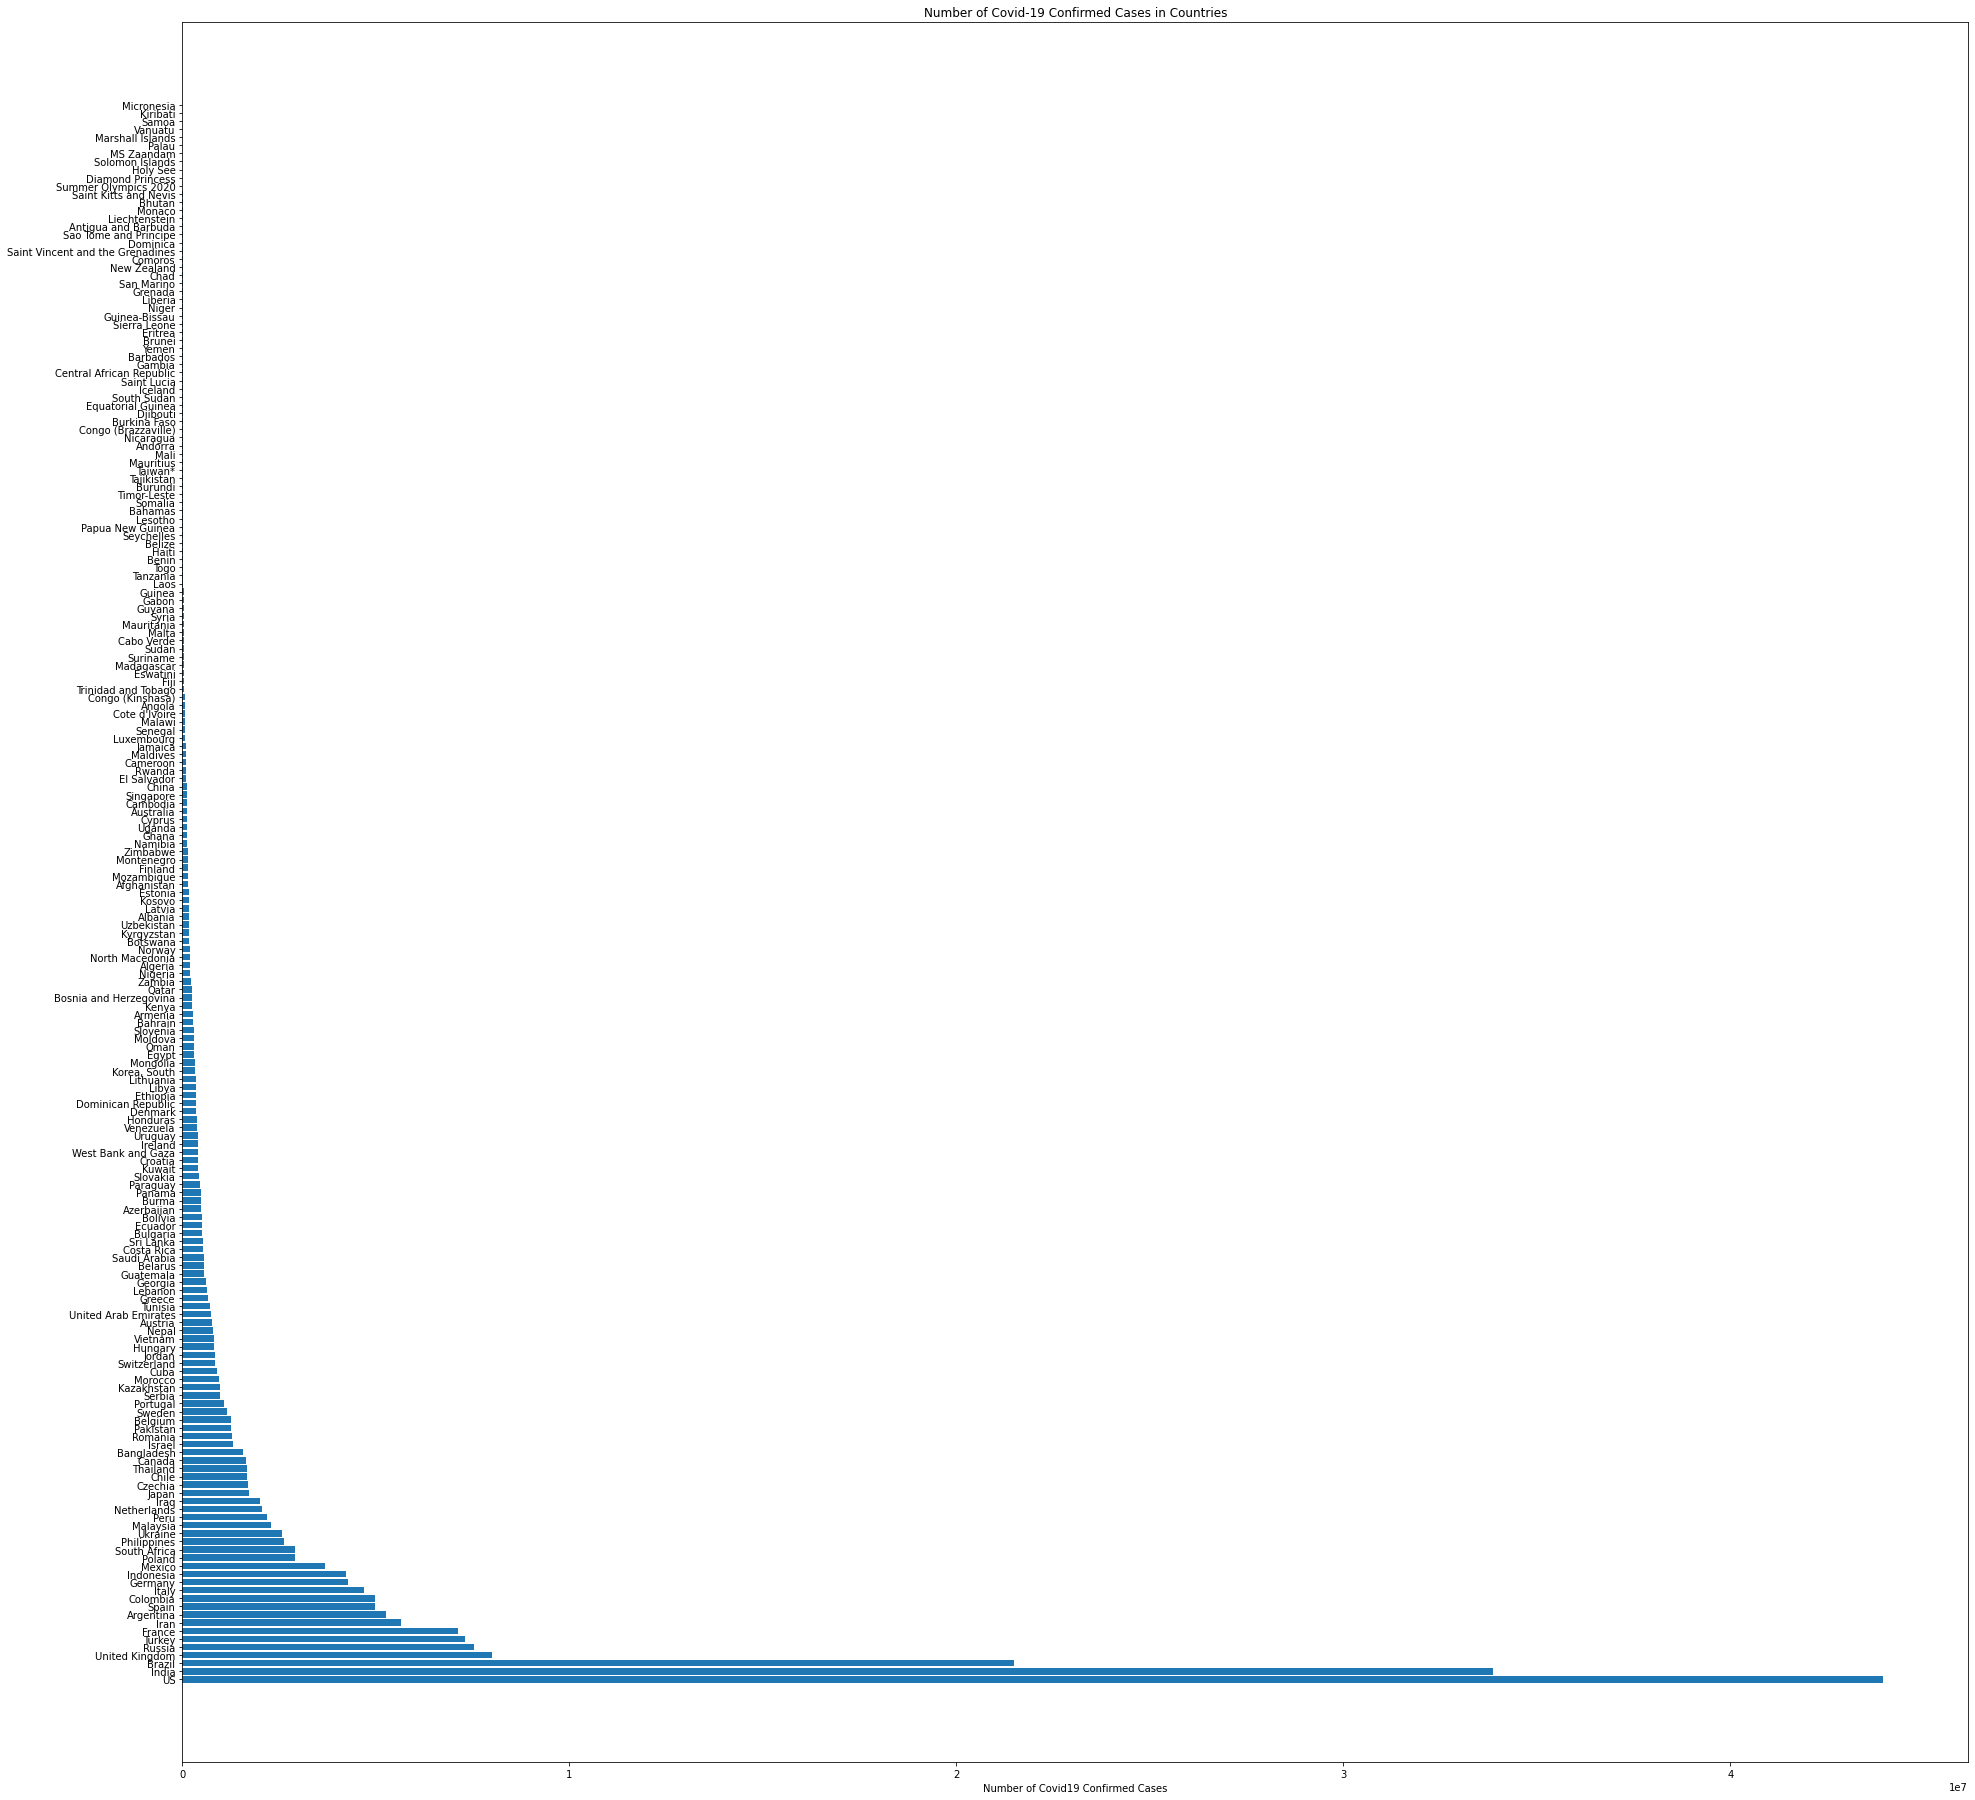

In [26]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

In [27]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

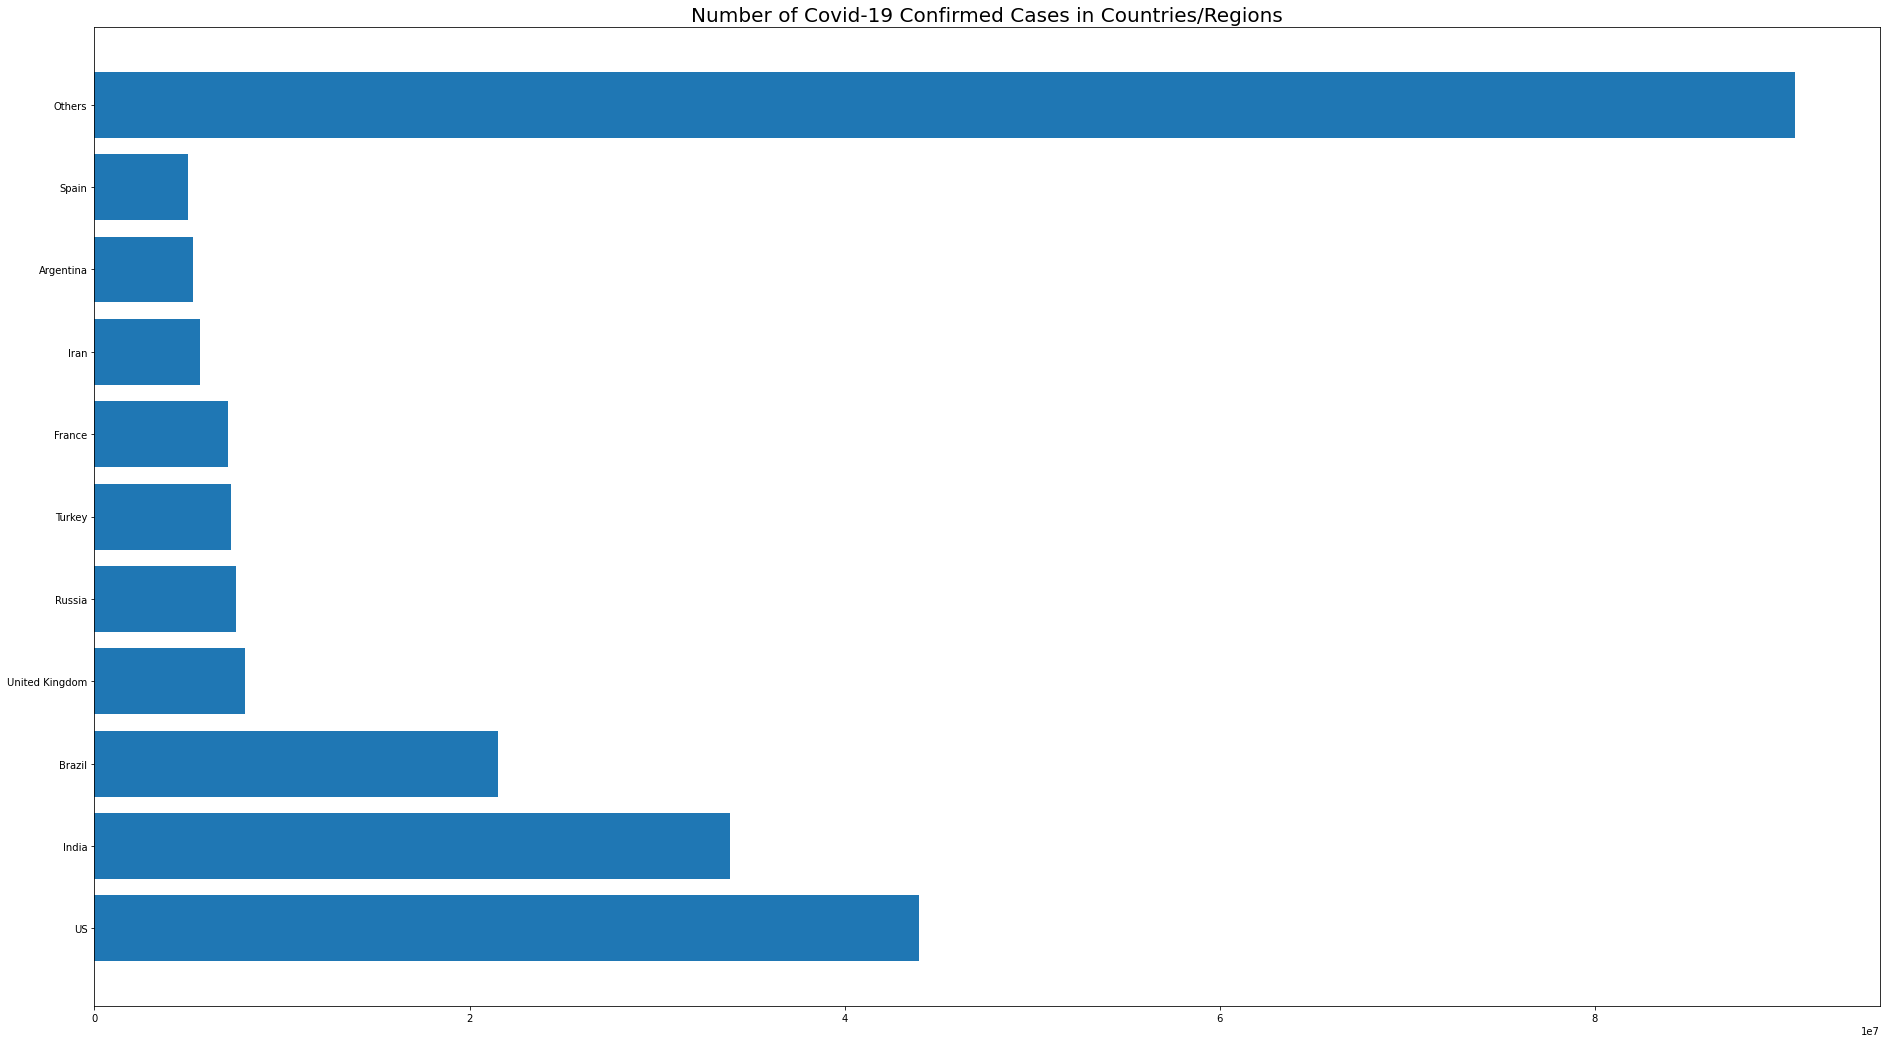

In [28]:
# Visualize the 10 countries

plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

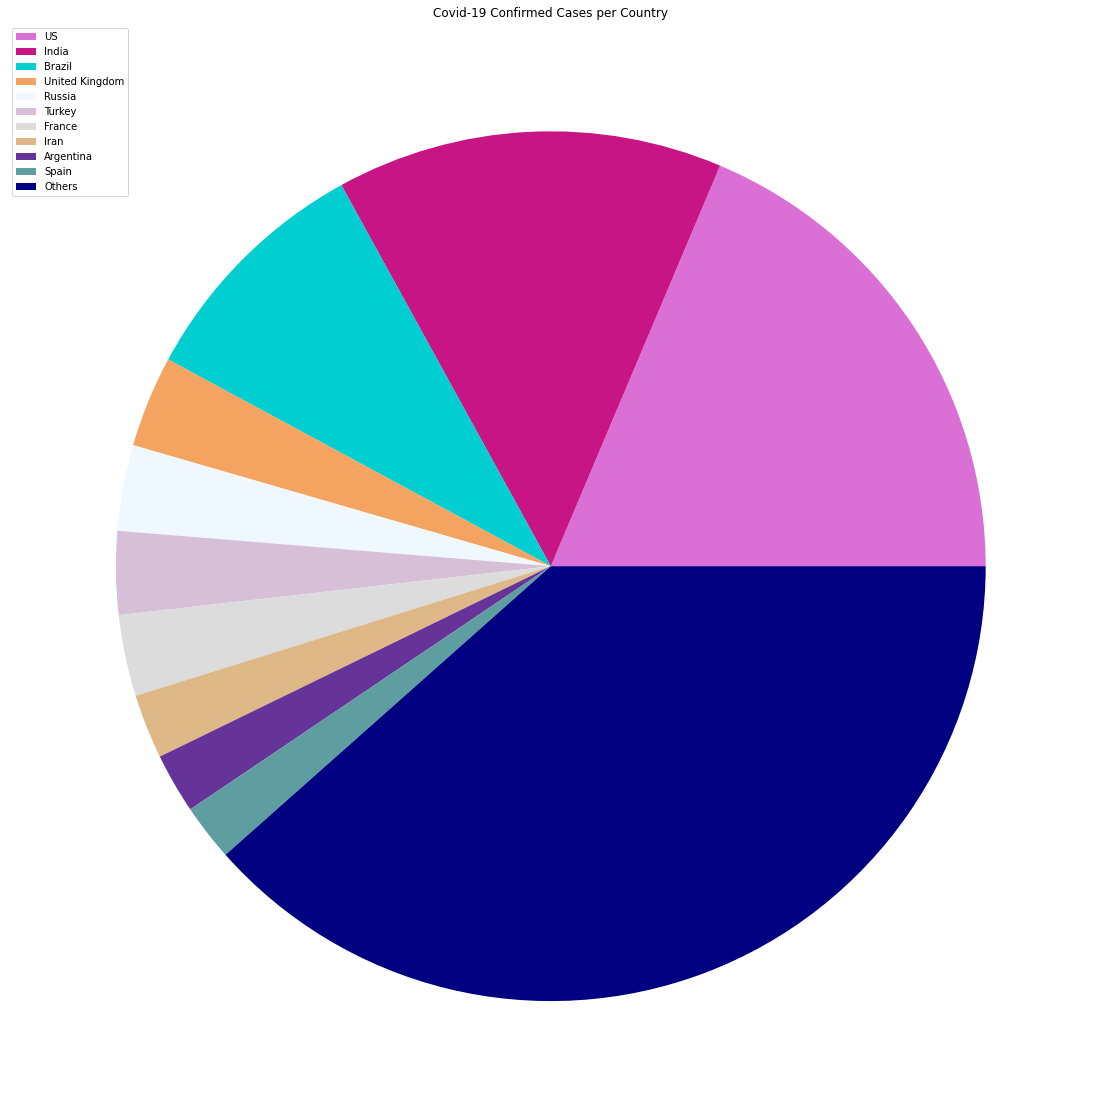

In [29]:
# Create a pie chart to see the total confirmed cases in 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

**Global Predictions**

In [30]:
# split data into train/test for global

start = datetime.date(2021, 1, 1)
today = datetime.date.today()
diff = today - start
days_to_skip = future_forecast[-1][0] - (100 or diff.days)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[days_to_skip:], world_cases[days_to_skip:], test_size=0.20, random_state=42)

In [31]:
# Building the SVM model

# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR(kernel='poly')
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [32]:
# svm_search.best_params_

In [33]:
# play arnd with the below
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# c = [0.01, 0.1, 1]

svm_confirmed = SVR(kernel='poly', gamma=0.01, epsilon=1, C=0.01)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_pred = svm_confirmed.predict(future_forecast)

MAE: 812709.0817754065
MSE: 1488518845931.775


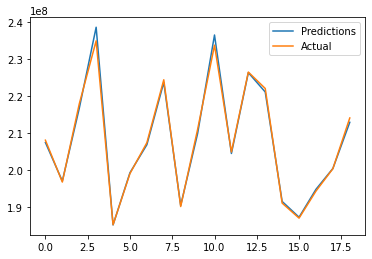

In [34]:
# check against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred, label="Predictions")
plt.plot(y_test_confirmed, label="Actual")
plt.legend(loc="best")
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:', mean_squared_error(svm_test_pred, y_test_confirmed))

In [35]:
# r^2 score for SVM

r2_score(y_test_confirmed, svm_test_pred)

0.9935513321604595

In [36]:
# Confirmed vs Predicted cases

# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, world_cases)
# plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
# plt.title('Number of Coronavirus Cases Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of Cases', size=30)
# plt.legend(['Confirmed Cases', 'SVM predictions'])
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [37]:
# Predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('10/06/2021', 240750297.51476705),
 ('10/07/2021', 241461889.507775),
 ('10/08/2021', 242175765.90329808),
 ('10/09/2021', 242891930.36223513),
 ('10/10/2021', 243610386.54548806),
 ('10/11/2021', 244331138.11395866),
 ('10/12/2021', 245054188.72854972),
 ('10/13/2021', 245779542.05016083),
 ('10/14/2021', 246507201.73969322),
 ('10/15/2021', 247237171.45804894)}

In [38]:
# Using Linear regression model to make predictions

linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)

MAE: 5393232.238337384
MSE: 37511363146721.59


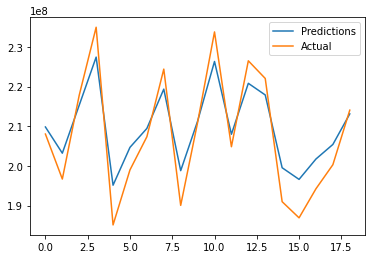

In [39]:
plt.plot(test_linear_pred, label="Predictions")
plt.plot(y_test_confirmed, label="Actual")
plt.legend(loc="best")
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))

In [40]:
# r^2 score for LR

r2_score(y_test_confirmed, test_linear_pred)

0.8374905888476234

In [41]:
# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, world_cases)
# plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
# plt.title('Number of Coronavirus Cases Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of Cases', size=30)
# plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [42]:
# Predictions for the next 10 days using Linear Regression

print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[2.28522321e+08]
 [2.28889130e+08]
 [2.29255940e+08]
 [2.29622749e+08]
 [2.29989559e+08]
 [2.30356368e+08]
 [2.30723178e+08]
 [2.31089987e+08]
 [2.31456797e+08]
 [2.31823606e+08]]


**Singapore Predictions**

In [43]:
# split data into train/test for Singapore

start = datetime.date(2021, 1, 1)
today = datetime.date.today()
diff = today - start
days_to_skip = future_forecast[-1][0] - (100 or diff.days)
X_train_sg_confirmed, X_test_sg_confirmed, y_train_sg_confirmed, y_test_sg_confirmed = train_test_split(days_since_1_22[days_to_skip:], singapore_cases[days_to_skip:], test_size=0.20, random_state=42)

In [44]:
# play arnd with the below
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# c = [0.01, 0.1, 1]

svm_sg_confirmed = SVR(kernel='poly', gamma=0.01, epsilon=1, C=0.01)
svm_sg_confirmed.fit(X_train_sg_confirmed, y_train_sg_confirmed.ravel())
svm_sg_pred = svm_sg_confirmed.predict(future_forecast)

MAE: 3723.4126013716673
MSE: 53796956.88582212


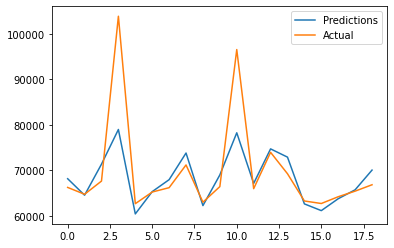

In [45]:
# check against testing data

svm_sg_test_pred = svm_sg_confirmed.predict(X_test_sg_confirmed)
plt.plot(svm_sg_test_pred, label="Predictions")
plt.plot(y_test_sg_confirmed, label="Actual")
plt.legend(loc="best")
print('MAE:', mean_absolute_error(svm_sg_test_pred, y_test_sg_confirmed))
print('MSE:', mean_squared_error(svm_sg_test_pred, y_test_sg_confirmed))

In [46]:
# r^2 score for SVM

r2_score(y_test_sg_confirmed, svm_sg_test_pred)

0.5450866105105248

In [47]:
# Predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_sg_pred[-10:]))

SVM future predictions:


{('10/06/2021', 79693.72482815092),
 ('10/07/2021', 79940.30333712405),
 ('10/08/2021', 80187.6734293372),
 ('10/09/2021', 80435.83637508457),
 ('10/10/2021', 80684.79344072645),
 ('10/11/2021', 80934.54589524573),
 ('10/12/2021', 81185.09500768488),
 ('10/13/2021', 81436.44204708641),
 ('10/14/2021', 81688.58828279084),
 ('10/15/2021', 81941.53497865504)}

In [48]:
# Using Linear regression model to make predictions

linear_model_sg = LinearRegression(fit_intercept=False)
linear_model_sg.fit(X_train_sg_confirmed, y_train_sg_confirmed)
test_linear_pred_sg = linear_model_sg.predict(X_test_sg_confirmed)
linear_pred_sg = linear_model_sg.predict(future_forecast)

MAE: 6106.7799663446485
MSE: 74940139.90708895


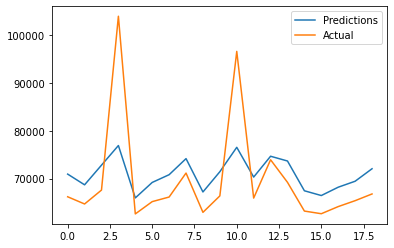

In [49]:
plt.plot(test_linear_pred_sg, label="Predictions")
plt.plot(y_test_sg_confirmed, label="Actual")
plt.legend(loc="best")
print('MAE:', mean_absolute_error(test_linear_pred_sg, y_test_sg_confirmed))
print('MSE:', mean_squared_error(test_linear_pred_sg, y_test_sg_confirmed))

In [50]:
# r^2 score for LR

r2_score(y_test_sg_confirmed, test_linear_pred_sg)

0.36629737019690267

In [51]:
# Predictions for the next 10 days using Linear Regression

print('Linear regression future predictions:')
print(linear_pred_sg[-10:])

Linear regression future predictions:
[[77274.04822483]
 [77398.08361524]
 [77522.11900564]
 [77646.15439605]
 [77770.18978646]
 [77894.22517687]
 [78018.26056728]
 [78142.29595769]
 [78266.3313481 ]
 [78390.36673851]]
